In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from imblearn.over_sampling import SMOTE


In [2]:
df = pd.read_csv("train.csv")
print(df.head())


    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0   

In [3]:
# Impute categorical features with most frequent
cat_cols = df.select_dtypes(include='object').columns
df[cat_cols] = df[cat_cols].apply(lambda x: x.fillna(x.mode()[0]))

# Impute numerical features with mean
num_cols = df.select_dtypes(include=np.number).columns
df[num_cols] = df[num_cols].apply(lambda x: x.fillna(x.mean()))


In [4]:
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])


In [5]:
X = df.drop(columns=["Loan_ID", "Loan_Status"])
y = df["Loan_Status"]
y = le.fit_transform(y)  # Convert Y/N to 0/1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)


In [7]:
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_sm, y_train_sm)
y_pred_log = log_model.predict(X_test)


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [8]:
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train_sm, y_train_sm)
y_pred_tree = tree_model.predict(X_test)


In [9]:
print("Logistic Regression Results:")
print(confusion_matrix(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))

print("Decision Tree Results:")
print(confusion_matrix(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree))


Logistic Regression Results:
[[22 21]
 [ 9 71]]
              precision    recall  f1-score   support

           0       0.71      0.51      0.59        43
           1       0.77      0.89      0.83        80

    accuracy                           0.76       123
   macro avg       0.74      0.70      0.71       123
weighted avg       0.75      0.76      0.74       123

Decision Tree Results:
[[25 18]
 [23 57]]
              precision    recall  f1-score   support

           0       0.52      0.58      0.55        43
           1       0.76      0.71      0.74        80

    accuracy                           0.67       123
   macro avg       0.64      0.65      0.64       123
weighted avg       0.68      0.67      0.67       123



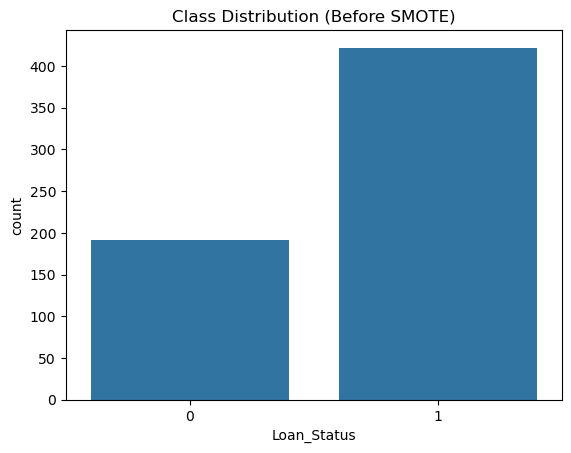

In [10]:
sns.countplot(x='Loan_Status', data=df)
plt.title("Class Distribution (Before SMOTE)")
plt.show()
